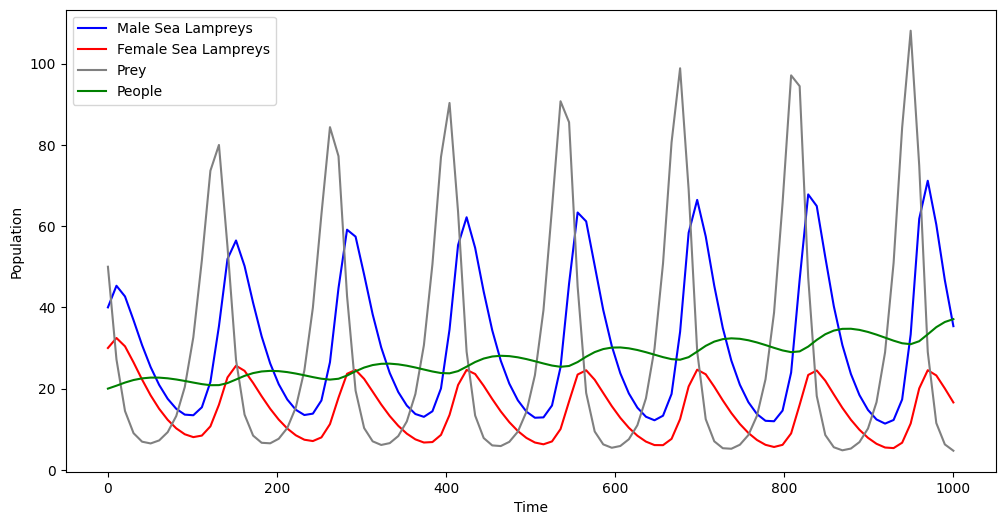

In [40]:
import numpy as np
from scipy.integrate import odeint

def S(y, t):
    M, F, P, A = y
    c = 0.08 #生殖率
    k = 0.01 #控制性转率
    N = M + F # 总数
    b = M / N #雄占比
    B = b * (1 - b) * c # 繁殖率
    Z = 0.30 / (2 + y[2]**k) + 0.53 #转雄概率
    rp, da = 0.09, 0.004# P生存率, a死亡率
    dm, df = 0.045, 0.035 #死亡率
    bm, bf, ba = 0.5, 0.4, 0.05 #捕获能力
    ap, aa = 0.002, 0.002#被捕率
    dM = B * Z * N - dm * M + bm * ap * P * M - aa * ba * A * M + 0.01 
    dF = B * (1 - Z) * N - df * F + bf * ap * P * F - aa * ba * A * F - 0.085 
    dP = rp * P - ap * P * N
    dA = - da * A + ba * aa * A * N
    return [dM, dF, dP, dA]

# 初始条件
y0 = [40, 30, 50, 20]

# 时间点
t = np.linspace(0, 1000, 100)

# 解ODE系统
M, F, P, A = odeint(S, y0, t).T

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(t, M, label='Male Sea Lampreys', color='blue')
plt.plot(t, F, label='Female Sea Lampreys', color='red')
plt.plot(t, P, label='Prey', color='grey')
plt.plot(t, A, label='People', color='green')
#plt.plot(time, M + F, label='Total Population', color='black')
plt.xlabel('Time')
plt.ylabel('Population')
#plt.title('Structured Population Model Simulation')
plt.legend()
plt.savefig(fname = 'population_model_simulation.jpg', dpi = 500, bbox_inches = 'tight')

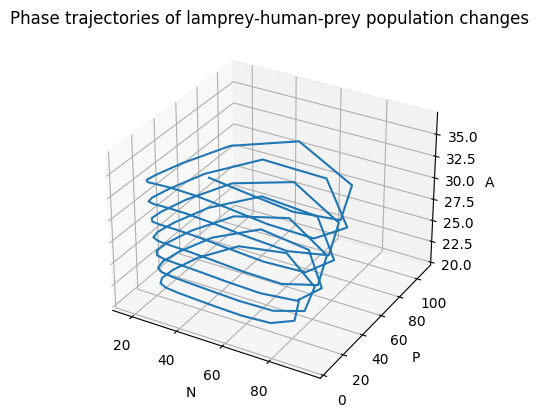

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# 创建3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制3D线性图
ax.plot(F + M, P, A)

# 设置坐标轴标签
ax.set_xlabel('N')
ax.set_ylabel('P')
ax.set_zlabel('A')
#ax.set_title('Phase trajectories of lamprey-human-prey population changes')
# 显示图形
plt.show()


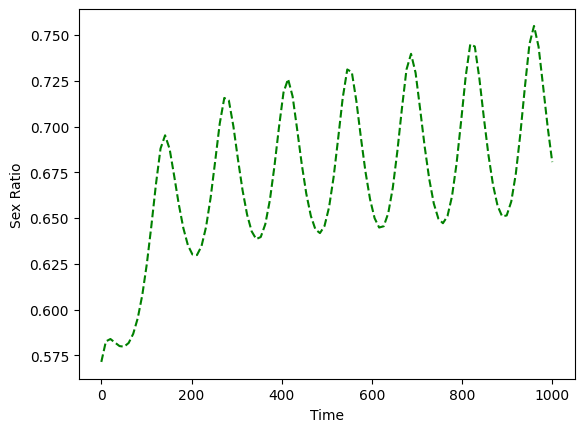

In [2]:
plt.plot(t, M / (M + F), 'g--', label='Male-Female Ratio')
plt.xlabel('Time')
plt.ylabel('Sex Ratio')
plt.savefig(fname = 'Sex_ratio.jpg', dpi = 500, bbox_inches = 'tight')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
ret = []
class SevenGillSharkCA:
    def __init__(self, size, change, alpha):
        self.size = size
        self.grid = np.ones((size, size)) * alpha # 随机生成资源分布
        self.gender_ratio = 0.5
        self.male_ratio_high_resource = 0.56
        self.male_ratio_low_resource = 0.78
        self.reproduction_rate = 0.8  # 初始繁殖率
        self.is_change = change

    def update(self):
        new_grid = self.grid.copy()

        for i in range(self.size):
            for j in range(self.size):
                if self.is_change:
                    if self.grid[i, j] > 0.5:  # 假设资源多于0.5为高资源区域
                        male_ratio = self.male_ratio_high_resource
                    else:
                        male_ratio = self.male_ratio_low_resource
                else: male_ratio = 0.5
                # 根据性别比例影响繁殖率
                reproduction_rate = self.reproduction_rate * (1 - abs(self.gender_ratio - male_ratio))

                # 在这里实现具体的繁殖规则，根据需要调整
                if np.random.choice([1, 0], p=[reproduction_rate, 1 - reproduction_rate]) == 1:
                    new_grid[i, j] -= 0.1
                else: new_grid[i, j] += 0.1

        self.grid = new_grid

    def plot(self):
        ret.append(sum(sum(self.grid >= 0.5)))

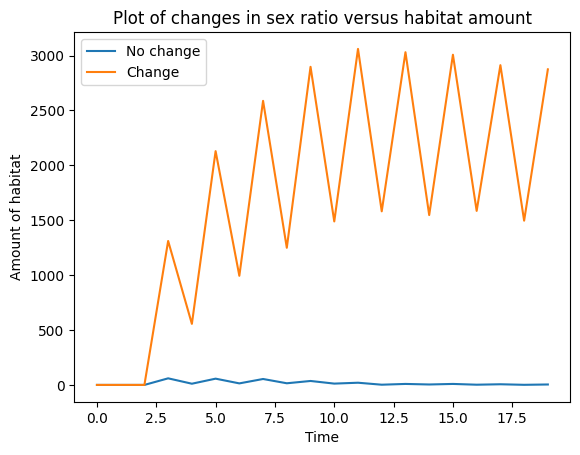

In [2]:
ca = SevenGillSharkCA(200, change=False, alpha=0.2)
cb = SevenGillSharkCA(200, change=True, alpha=0.2)
for i in range(20):
    ca.update()
    ca.plot()
for i in range(20):
    cb.update()
    cb.plot()
plt.plot(ret[:20], label='No change')
plt.plot(ret[20:], label ='Change')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amount of habitat')
plt.title('Plot of changes in sex ratio versus habitat amount')
plt.savefig(fname = 'sex_ratio_habitat.jpg', dpi = 500, bbox_inches = 'tight')

650


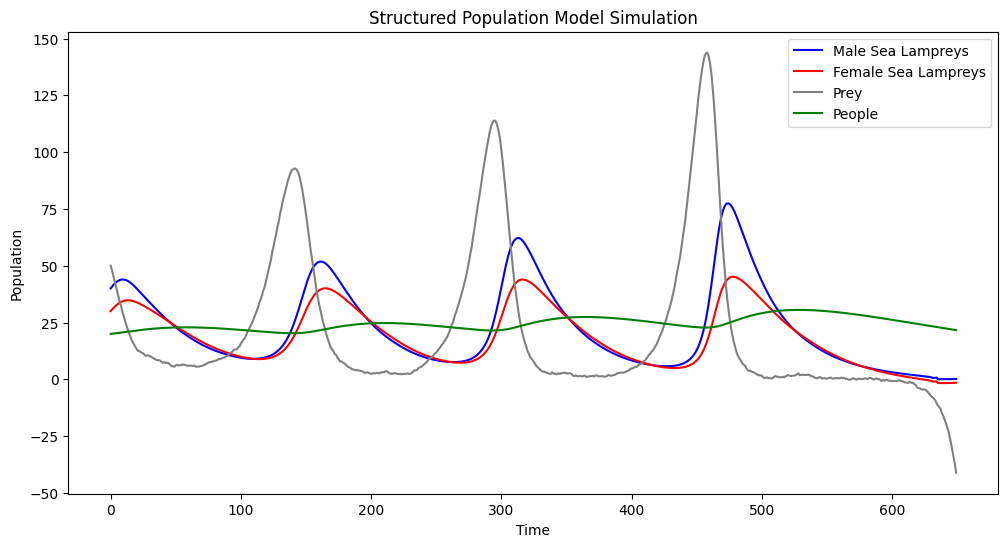

In [64]:
import numpy as np
from scipy.integrate import odeint

np.random.seed(0)
def S(y, t):
    M, F, P, A = y
    c = 0.08 #生殖率
    k = 0.01 #控制性转率
    N = M + F # 总数
    b = M / N #雄占比
    B = b * (1 - b) * c # 繁殖率
    Z = 0.5#0.30 / (2 + y[2]**k) + 0.53 #转雄概率
    rp, da = 0.09, 0.004# P生存率, a死亡率
    dm, df = 0.045, 0.035 #死亡率
    bm, bf, ba = 0.5, 0.4, 0.05 #捕获能力
    ap, aa = 0.002, 0.002#被捕率
    dM = B * Z * N - dm * M + bm * ap * P * M - aa * ba * A * M + 0.01 #+ np.random.normal(0, 0.1)
    dF = B * (1 - Z) * N - df * F + bf * ap * P * F - aa * ba * A * F - 0.085 #+ np.random.normal(0, 0.1)
    dP = rp * P - ap * P * N + np.random.normal(0, 0.5)
    dA = - da * A + ba * aa * A * N #+ np.random.normal(0, 0.1)
    return np.array([dM, dF, dP, dA])

# 初始条件
y0 = [40, 30, 50, 20]

# 解ODE系统
#M, F, P, A = odeint(S, y0, t).T
def runge_kutta_4th_order(t, y, dt, f):
    # 使用四阶龙格库塔方法进行数值求解
    k1 = dt * f(y, t)
    k2 = dt * f(y + k1/2, t + dt/2)
    k3 = dt * f(y + k2/2, t + dt/2)
    k4 = dt * f(y + k3, t + dt)
    
    return y + (k1 + 2*k2 + 2*k3 + k4)/6


# 设置时间步长和总的模拟时间
dt = 1
total_time = 650#858.0

# 初始化时间和解数组
time_points = np.arange(0, total_time, dt)
num_points = len(time_points)
print(num_points)
solution = np.zeros((num_points, len(y0)))

# 使用龙格库塔方法进行数值求解
solution[0, :] = y0
for i in range(1, num_points):
    solution[i, :] = runge_kutta_4th_order(time_points[i-1], solution[i-1, :], dt, S)

M, F, P, A = solution.T
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(time_points, M, label='Male Sea Lampreys', color='blue')
plt.plot(time_points, F, label='Female Sea Lampreys', color='red')
plt.plot(time_points, P, label='Prey', color='grey')
plt.plot(time_points, A, label='People', color='green')
#plt.plot(time, M + F, label='Total Population', color='black')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Structured Population Model Simulation')
plt.legend()